<a href="https://colab.research.google.com/github/arif5535/Semantic-segmentation/blob/main/Another_copy_of_334_training_YOLO_V8_EM_platelets_converted_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/ytlhMAF6ok0

# **Custom instance model training using YOLOv8**
<p>
This code walks you through the process of training a custom YOLO v8 model using your own data. Here, I am using a public dataset that shows multiple classes for segmentation. This is the same dataset from tutorial 330 (Detectron2) - https://youtu.be/cEgF0YknpZw

<p>
Dataset from: https://leapmanlab.github.io/dense-cell/
<br>
Direct link to the dataset: https://www.dropbox.com/s/68yclbraqq1diza/platelet_data_1219.zip

**Data courtesy of:**
Guay, M.D., Emam, Z.A.S., Anderson, A.B. et al. ​
Dense cellular segmentation for EM using 2D–3D neural network ensembles. Sci Rep 11, 2561 (2021). ​
<p>
To prepare this dataset for YOLO, the binary masks were converted to the YOLO format. Please follow this tutorial to learn about this process. <br>
(https://youtu.be/NYeJvxe5nYw)

<p>

If you already have annotations in COCO format JSON file, for example by annotating using makesense (https://www.makesense.ai/) then the annotations can be imported to Roboflow for conversion to YOLO format. Otherwise, if you are starting from scratch, just annotate datasets on Roboflow. (https://roboflow.com/). You just need to upload your images along with the JSON file and Roboflow will convert them to any other format, in our case YOLO v8. <p>

For information about YOLO models: <p>
https://docs.ultralytics.com/models/yolov8/#key-features
<p>


**Install the required libraries:**

Let us start by installing ultralytics library. All other libraries should be pre-installed on colab. If you are working on a local system, please make sure you install matplotlib, Pillow, numpy, Seaborn, and roboflow. You may also want to install pandas and other libraries depending on the task.

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [39]:
!ls '/content/gdrive/My Drive/hair_root/'

DATA_DIR = '/content/gdrive/My Drive/hair_root/'

data.yaml  results  test  train  valid


In [3]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 9.5 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

**Import a model and populate it with pre-trained weights.**
<p>
Here, we are importing an instance segmentation model with weights. For a list of pre-trained models, checkout: https://docs.ultralytics.com/models/yolov8/#key-features

In [5]:
#Instance
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 181MB/s]


**Install Roboflow**
<p>
to directly read our training data. For colab, we are going to find a workaround to handle encoding issues by the platform. In fact, we may encounter encoding issues for other tasks in Colab so let's go ahead and run the following cell.  

In [6]:
#Withut this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In case your annotations are on Roboflow, you can directly import the training data using your API key

In [ ]:
#!pip install roboflow --quiet
#%cd /content/

In [ ]:
# To hide your API key from others, you can use getpass
#from getpass import getpass
#token = getpass('Enter Token Here') #I stored my token in a file on my Google Drive. I will enter it when prompted here.

In [ ]:
# Import your data from Roboflow
"""
from roboflow import Roboflow
rf = Roboflow(api_key=token)
project = rf.workspace("python-for-microscopists-nceyk").project("3d-em-platelet")
dataset = project.version(2).download("yolov8")
"""
#Change the working directory to the downloaded data directory and check the yaml file.
#%cd /content/your_dataset

Let us load the YAML file that contains the names of our classes, number of classes and the directories for train, valid, and test datasets, respectively.

In [7]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/gdrive/MyDrive/hair_root/data.yaml

names:
- hair_root
- non_hair_root

nc: 2
test: ../test/images
train: /content/gdrive/MyDrive/hair_root/train/images
val: /content/gdrive/MyDrive/hair_root/valid/images

In [8]:
# define number of classes based on YAML
import yaml
with open("/content/gdrive/MyDrive/hair_root/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [9]:
dataset_type = "segment"

if dataset_type not in open("/content/gdrive/MyDrive/hair_root/data.yaml").read():
    print("The dataset is not a segment dataset.")

The dataset is not a segment dataset.


**Train the model**

In [10]:
#Define a project --> Destination directory for all results
project = "/content/gdrive/MyDrive/hair_root/results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [11]:
# Train the model
results = model.train(data='/content/gdrive/MyDrive/hair_root/data.yaml',
                      project=project,
                      name=name,
                      epochs=500,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=1000)

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/hair_root/data.yaml, epochs=500, time=None, patience=0, batch=4, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/gdrive/MyDrive/hair_root/results, name=200_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

100%|██████████| 755k/755k [00:00<00:00, 114MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/gdrive/MyDrive/hair_root/train/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/hair_root/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/hair_root/results/200_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to /content/gdrive/MyDrive/hair_root/results/200_epochs-2
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      1.53G      2.381       4.26      2.478         14       1024: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all          7          7          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      1.37G      2.396      4.487      2.678         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all          7          7          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      1.39G      2.872      4.384      3.007         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          7          7    0.00103      0.167    0.00318   0.000318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      1.39G      2.137      3.745      2.357         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all          7          7    0.00132        0.5       0.14     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      1.41G      2.025      3.774      2.411         14       1024: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all          7          7    0.00219      0.667      0.324     0.0755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      1.39G      2.057      3.711      2.452         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


                   all          7          7    0.00199        0.5      0.315     0.0602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      1.39G      1.925      3.229      2.282         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all          7          7    0.00199        0.5      0.315     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      1.41G      1.658      3.174      2.083         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          7          7    0.00118       0.25     0.0622    0.00747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      1.43G      1.454      3.103      1.867         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all          7          7    0.00205        0.5      0.075      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      1.39G      1.858       3.44      2.182         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all          7          7    0.00205        0.5      0.075      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      1.39G      1.913       3.28      2.086          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all          7          7    0.00196        0.5     0.0523    0.00955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      1.39G      1.589      2.805      1.984         12       1024: 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          7          7    0.00196        0.5     0.0523    0.00955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      1.39G      1.717      2.876      2.038         13       1024: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all          7          7   0.000905       0.25     0.0105    0.00115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      1.39G      1.561      2.957       2.03          8       1024: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all          7          7   0.000905       0.25     0.0105    0.00115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      1.39G      1.841      3.149      2.136         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all          7          7    0.00286      0.875     0.0256    0.00326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      1.39G      1.841      2.936      2.041         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          7          7    0.00286      0.875     0.0256    0.00326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      1.39G       1.86      2.845      2.105         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all          7          7    0.00286      0.875     0.0256    0.00326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      1.41G       1.72      3.021      2.054          8       1024: 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


                   all          7          7      0.266      0.458      0.188      0.026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      1.39G      1.613      2.512      1.914         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          7          7      0.266      0.458      0.188      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      1.39G      1.709      2.741      1.996         13       1024: 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          7          7      0.266      0.458      0.188      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      1.39G      1.617      2.836      2.035         13       1024: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          7          7      0.266      0.458      0.188      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      1.41G      1.394      2.534      1.928         13       1024: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all          7          7      0.117      0.458     0.0996     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      1.39G      1.348      2.425      1.898         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          7          7      0.117      0.458     0.0996     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      1.42G      1.621      2.602      2.027         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all          7          7      0.117      0.458     0.0996     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      1.39G       1.94      2.849      2.227         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all          7          7      0.117      0.458     0.0996     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      1.43G      2.092      2.759       2.21         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all          7          7      0.649      0.167      0.227      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      1.39G      2.322      3.321      2.335          6       1024: 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


                   all          7          7      0.649      0.167      0.227      0.024

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      1.41G      1.831      2.701      2.057         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


                   all          7          7      0.649      0.167      0.227      0.024

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      1.42G      1.435       2.46      1.787          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all          7          7      0.649      0.167      0.227      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      1.42G      2.127      3.165      2.372         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all          7          7     0.0432      0.125     0.0413    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      1.39G       1.82       2.95      2.018         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all          7          7     0.0432      0.125     0.0413    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      1.39G      1.765      3.018      2.051         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all          7          7     0.0432      0.125     0.0413    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      1.39G      1.689       2.67      1.828          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all          7          7     0.0432      0.125     0.0413    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      1.39G      1.916      2.709      2.103         16       1024: 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all          7          7     0.0241      0.125     0.0284    0.00398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      1.41G      2.011      3.021      2.089         13       1024: 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all          7          7     0.0241      0.125     0.0284    0.00398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      1.39G      1.819      2.664      1.962         17       1024: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all          7          7     0.0241      0.125     0.0284    0.00398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      1.41G       1.87      2.856      1.988         15       1024: 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all          7          7     0.0241      0.125     0.0284    0.00398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      1.39G      2.868      4.149      2.724          6       1024: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all          7          7       0.11      0.167     0.0559    0.00559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      1.39G      2.006      2.669      2.253         12       1024: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all          7          7       0.11      0.167     0.0559    0.00559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      1.39G       1.67      2.604      1.976         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          7          7       0.11      0.167     0.0559    0.00559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      1.39G      1.738      2.563      1.972         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all          7          7       0.11      0.167     0.0559    0.00559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      1.39G        1.9      2.719      2.061         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all          7          7     0.0164      0.125    0.00615    0.00123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      1.39G      1.862      2.586      2.149         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          7          7     0.0164      0.125    0.00615    0.00123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      1.39G      1.931      3.313      2.106          7       1024: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all          7          7     0.0164      0.125    0.00615    0.00123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      1.42G      1.783      2.707      2.018         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all          7          7     0.0164      0.125    0.00615    0.00123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      1.39G       2.11      2.993      2.109          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      1.39G      1.446      2.572      2.037         14       1024: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      1.39G      2.151      2.858      2.029         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      1.41G      1.692      2.525      2.047         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      1.41G      1.826        2.6      2.252         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      1.41G      1.756      2.638      2.222         11       1024: 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      1.41G      1.952      2.808       2.39         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      1.41G      1.918      2.793       2.02         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      1.39G      2.032      2.806      2.045          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      1.39G      1.807       2.84      1.998         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      1.39G      1.641      2.486      1.955         14       1024: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      1.42G      1.985      2.724       2.14          8       1024: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all          7          7      0.527      0.125     0.0106    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      1.42G      1.882      2.679       2.19         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all          7          7      0.824      0.375      0.311     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      1.39G      2.065      2.621      2.167         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


                   all          7          7      0.824      0.375      0.311     0.0373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      1.39G      1.665      2.501      1.935         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all          7          7      0.824      0.375      0.311     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500       1.4G      2.082      2.898      2.055         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all          7          7      0.824      0.375      0.311     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      1.39G      1.717      2.436      1.968         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all          7          7      0.107      0.333     0.0951     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      1.39G      1.821      2.779      1.849          9       1024: 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all          7          7      0.107      0.333     0.0951     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      1.39G       1.67       2.52      2.053         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all          7          7      0.107      0.333     0.0951     0.0123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      1.42G      1.604      2.634      1.819         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7          7      0.107      0.333     0.0951     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      1.39G      1.509      2.428      1.837         26       1024: 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          7          7     0.0409      0.167     0.0336    0.00825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      1.39G      2.049      2.674      2.112          9       1024: 100%|██████████| 4/4 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all          7          7     0.0409      0.167     0.0336    0.00825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      1.39G      1.545      2.363      1.881         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all          7          7     0.0409      0.167     0.0336    0.00825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      1.39G      1.501      2.271      1.882         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          7          7     0.0409      0.167     0.0336    0.00825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      1.41G      1.513      2.523      1.821         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all          7          7      0.734      0.167      0.168     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      1.42G      1.959       2.61      2.107         20       1024: 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all          7          7      0.734      0.167      0.168     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      1.39G      1.785      2.621        2.1         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          7          7      0.734      0.167      0.168     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      1.42G       1.79      2.557      1.974          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          7          7      0.734      0.167      0.168     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      1.39G      1.988      2.813      1.993         12       1024: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          7          7      0.601      0.167     0.0687      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      1.41G      1.476      2.413      1.872         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all          7          7      0.601      0.167     0.0687      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      1.39G      1.577      2.268      1.888         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          7          7      0.601      0.167     0.0687      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      1.39G      1.569      2.382      1.877         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all          7          7      0.601      0.167     0.0687      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      1.39G      1.446      2.319      1.821         22       1024: 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


                   all          7          7      0.268      0.583      0.375     0.0697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      1.39G      1.389      2.311      1.775         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all          7          7      0.268      0.583      0.375     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      1.39G      1.654      2.479      1.901          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all          7          7      0.268      0.583      0.375     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      1.41G      1.291      2.203      1.765          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all          7          7      0.268      0.583      0.375     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      1.41G      1.718      2.506      1.942         11       1024: 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          7          7      0.807      0.333      0.222     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      1.41G      1.811      2.726      1.767         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          7          7      0.807      0.333      0.222     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      1.41G      1.336      2.159      1.902         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all          7          7      0.807      0.333      0.222     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      1.42G      1.703      2.582      1.966         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all          7          7      0.807      0.333      0.222     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      1.39G      2.106      2.923      2.043         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all          7          7      0.488      0.583      0.612     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      1.39G      1.848      2.502      1.969         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


                   all          7          7      0.488      0.583      0.612     0.0927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      1.39G      1.454      2.267      1.781          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all          7          7      0.488      0.583      0.612     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      1.39G      1.439      2.244      1.681         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all          7          7      0.488      0.583      0.612     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      1.39G      1.474      2.252      1.953         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          7          7      0.818          1      0.871      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      1.39G      1.595       2.26       1.83         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          7          7      0.818          1      0.871      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      1.39G      1.451      2.116      1.797         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all          7          7      0.818          1      0.871      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      1.39G      1.612      2.337      1.869         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all          7          7      0.818          1      0.871      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      1.42G      1.299      1.958      1.767         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all          7          7      0.698          1      0.863      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      1.39G      1.456      2.167       1.69         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]

                   all          7          7      0.698          1      0.863      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      1.41G      1.998      2.671      1.907          6       1024: 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          7          7      0.698          1      0.863      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      1.39G       1.29      2.001      1.833         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all          7          7      0.698          1      0.863      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      1.39G      1.407      2.088      1.738         17       1024: 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all          7          7      0.723      0.833      0.892       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      1.42G      1.315      2.077      1.771         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all          7          7      0.723      0.833      0.892       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      1.39G      1.406      2.249      1.718         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all          7          7      0.723      0.833      0.892       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      1.42G      1.945      2.426      1.997         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


                   all          7          7      0.723      0.833      0.892       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      1.39G      1.609      2.345       1.85          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all          7          7      0.648      0.417       0.44     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      1.42G      1.533      2.403      1.827          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all          7          7      0.648      0.417       0.44     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      1.41G      1.924      2.302      2.013         20       1024: 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all          7          7      0.648      0.417       0.44     0.0599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      1.39G      1.619      2.238       1.96         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all          7          7      0.648      0.417       0.44     0.0599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500       1.4G      1.833       2.72      1.988          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all          7          7      0.119       0.25       0.13     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      1.39G      1.687      2.244      1.844         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all          7          7      0.119       0.25       0.13     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      1.42G      1.573      2.281      1.842         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


                   all          7          7      0.119       0.25       0.13     0.0272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      1.41G      1.926      2.364      2.132         20       1024: 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          7          7      0.119       0.25       0.13     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      1.41G      1.531      2.266       1.93         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all          7          7      0.408      0.413      0.328     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      1.42G      1.643      2.393       1.87          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all          7          7      0.408      0.413      0.328     0.0697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      1.41G      1.497      2.076      1.903         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all          7          7      0.408      0.413      0.328     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      1.39G      1.304      2.105      1.761         14       1024: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all          7          7      0.408      0.413      0.328     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      1.39G      1.458      2.293      1.798          8       1024: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          7          7      0.809      0.833      0.805      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      1.39G      2.081      2.702      1.986          7       1024: 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]


                   all          7          7      0.809      0.833      0.805      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      1.39G      1.737      2.302      1.823         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          7          7      0.809      0.833      0.805      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      1.42G      1.445      2.174      1.841         18       1024: 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all          7          7      0.809      0.833      0.805      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      1.39G      1.366      2.228      1.779         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


                   all          7          7      0.581      0.783      0.755      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      1.41G      1.473      2.171      1.882         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]


                   all          7          7      0.581      0.783      0.755      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      1.39G      1.292      2.107      1.718         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          7          7      0.581      0.783      0.755      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      1.39G      1.519      2.216      1.784         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          7          7      0.581      0.783      0.755      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      1.42G      1.539      2.284      1.851         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all          7          7      0.434      0.833      0.714      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      1.39G      1.445      2.086      1.831         13       1024: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all          7          7      0.434      0.833      0.714      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      1.39G      1.491      2.142      1.887         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all          7          7      0.434      0.833      0.714      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      1.39G      1.263      2.118      1.779         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


                   all          7          7      0.434      0.833      0.714      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      1.43G      1.531      2.142      1.747         17       1024: 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all          7          7      0.481      0.708      0.777      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      1.39G      1.965      2.574      1.924          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all          7          7      0.481      0.708      0.777      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      1.39G      1.554      2.138      1.791         19       1024: 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all          7          7      0.481      0.708      0.777      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      1.39G      1.588      2.282      1.832         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


                   all          7          7      0.481      0.708      0.777      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      1.42G      1.488      2.062      1.896         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all          7          7      0.697      0.797      0.775      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      1.39G      1.262      2.098       1.79         17       1024: 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all          7          7      0.697      0.797      0.775      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      1.39G      1.429      2.095      1.804         18       1024: 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


                   all          7          7      0.697      0.797      0.775      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      1.39G      1.535      2.019      1.766         20       1024: 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          7          7      0.697      0.797      0.775      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      1.42G      1.728       2.21      1.972         19       1024: 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]


                   all          7          7          1      0.812       0.83       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      1.39G      1.426      2.053      1.683         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]


                   all          7          7          1      0.812       0.83       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      1.39G      1.244      1.902      1.703         17       1024: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]


                   all          7          7          1      0.812       0.83       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      1.39G      1.228      2.059      1.618         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all          7          7          1      0.812       0.83       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      1.41G      1.807      2.206      1.975         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all          7          7      0.945          1      0.995      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      1.39G      1.424      2.032      1.649         16       1024: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all          7          7      0.945          1      0.995      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      1.39G      1.474      1.976      1.725          9       1024: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all          7          7      0.945          1      0.995      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      1.42G       1.53       2.17      1.866         16       1024: 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]


                   all          7          7      0.945          1      0.995      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      1.41G      1.544      2.197      1.623         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all          7          7      0.801      0.708      0.904      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500       1.4G      1.462       1.98      1.751         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          7          7      0.801      0.708      0.904      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      1.39G      1.847      2.382      1.777         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          7          7      0.801      0.708      0.904      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      1.39G      1.487      1.982      1.666         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]


                   all          7          7      0.801      0.708      0.904      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      1.41G      1.515      2.233      1.823         13       1024: 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          7          7      0.813      0.875      0.929      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      1.43G      1.153       1.83      1.704         12       1024: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all          7          7      0.813      0.875      0.929      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      1.39G      1.614      2.176      1.859         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          7          7      0.813      0.875      0.929      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      1.39G      1.331      1.996      1.767         19       1024: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all          7          7      0.813      0.875      0.929      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      1.39G      1.476      2.005      1.902         21       1024: 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all          7          7      0.699      0.952      0.995       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      1.41G      1.484      2.128      1.814         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all          7          7      0.699      0.952      0.995       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      1.42G       1.24      1.806      1.798         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all          7          7      0.699      0.952      0.995       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      1.42G      1.469      2.068      1.758          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          7          7      0.699      0.952      0.995       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      1.41G      1.626      2.133        1.7         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all          7          7      0.634      0.881      0.954      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      1.42G      1.543      2.156       1.82         18       1024: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          7          7      0.634      0.881      0.954      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      1.39G      1.458      2.037      1.818         13       1024: 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          7          7      0.634      0.881      0.954      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      1.41G      1.634      2.256      1.714         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all          7          7      0.634      0.881      0.954      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      1.41G      1.364      1.987      1.699         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all          7          7      0.723          1      0.954      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      1.41G      1.642      2.349      1.824         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


                   all          7          7      0.723          1      0.954      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      1.42G      1.534      2.039      1.844         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all          7          7      0.723          1      0.954      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      1.39G      1.283      1.939      1.685         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all          7          7      0.723          1      0.954      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      1.39G      1.491      2.202      1.665          6       1024: 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all          7          7      0.675      0.999      0.746       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      1.39G       1.51      2.099        1.6          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          7          7      0.675      0.999      0.746       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      1.39G       1.41      2.012      1.838         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all          7          7      0.675      0.999      0.746       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      1.39G       1.19      1.741      1.644         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]


                   all          7          7      0.675      0.999      0.746       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      1.39G      1.175      1.909      1.539          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all          7          7      0.567      0.833      0.616      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      1.43G        1.4        1.9      1.675         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all          7          7      0.567      0.833      0.616      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      1.41G      1.346      1.968        1.6          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


                   all          7          7      0.567      0.833      0.616      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      1.39G      1.281      1.979      1.607          5       1024: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all          7          7      0.567      0.833      0.616      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      1.39G      1.344      1.973      1.672         16       1024: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


                   all          7          7      0.635      0.833      0.726      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      1.39G       1.66      2.169      1.627         19       1024: 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all          7          7      0.635      0.833      0.726      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      1.39G      1.328      1.941      1.552          8       1024: 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all          7          7      0.635      0.833      0.726      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      1.42G      1.193      2.055      1.651         11       1024: 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all          7          7      0.635      0.833      0.726      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      1.39G      1.151      1.887      1.534         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          7          7      0.453      0.833      0.774      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      1.39G      1.239      2.031      1.726          6       1024: 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          7          7      0.453      0.833      0.774      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      1.41G      1.783      2.145       1.89         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all          7          7      0.453      0.833      0.774      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      1.42G      1.228      1.724      1.574          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


                   all          7          7      0.453      0.833      0.774      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      1.39G      1.627      2.057      1.864         16       1024: 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]


                   all          7          7      0.475          1      0.863      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      1.39G      1.545      1.883      1.824         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          7          7      0.475          1      0.863      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      1.41G      1.326      1.937      1.826          8       1024: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          7          7      0.475          1      0.863      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      1.39G      1.577      2.114      1.628         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          7          7      0.475          1      0.863      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      1.39G      1.449      1.932      1.711         14       1024: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all          7          7          1      0.942      0.995      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      1.43G      1.608      2.051       1.94         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all          7          7          1      0.942      0.995      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      1.39G      1.412      1.858       1.77          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all          7          7          1      0.942      0.995      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      1.39G      1.385      1.881      1.899         18       1024: 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          7          7          1      0.942      0.995      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      1.39G      1.285      1.818      1.679         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all          7          7      0.832      0.875      0.953      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      1.39G      1.563      2.024      1.895         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all          7          7      0.832      0.875      0.953      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      1.42G      1.333      1.836      1.859         14       1024: 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all          7          7      0.832      0.875      0.953      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      1.39G      1.402      2.044      1.709         12       1024: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all          7          7      0.832      0.875      0.953      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      1.42G      1.722      2.183      2.003         18       1024: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all          7          7      0.821       0.84       0.92      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      1.39G      1.407      1.965      1.668         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          7          7      0.821       0.84       0.92      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      1.39G      1.147      1.821      1.684         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all          7          7      0.821       0.84       0.92      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      1.39G      1.646      2.143      1.802         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          7          7      0.821       0.84       0.92      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      1.42G      1.466      2.109      1.591         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          7          7      0.682      0.875       0.87      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      1.39G      1.155      1.761      1.661         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all          7          7      0.682      0.875       0.87      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      1.41G      1.454      2.131      1.696         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]


                   all          7          7      0.682      0.875       0.87      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      1.41G      1.632      2.173      1.775         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all          7          7      0.682      0.875       0.87      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      1.43G      1.435      2.001      1.842         11       1024: 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all          7          7      0.454      0.583      0.619      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      1.41G      1.494      1.931      1.821         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all          7          7      0.454      0.583      0.619      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      1.39G      1.142      1.788      1.642         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all          7          7      0.454      0.583      0.619      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      1.39G      1.466      2.027       1.89         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all          7          7      0.454      0.583      0.619      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      1.39G      1.216      1.936      1.715         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


                   all          7          7      0.713      0.875      0.888      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      1.41G      1.166      1.892      1.652         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]

                   all          7          7      0.713      0.875      0.888      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      1.42G      1.266      1.805      1.606         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all          7          7      0.713      0.875      0.888      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      1.39G      1.404      1.807      1.683         16       1024: 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          7          7      0.713      0.875      0.888      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      1.39G      1.238      1.854      1.505         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all          7          7      0.608      0.909      0.888      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      1.39G      1.253      1.827      1.599         18       1024: 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all          7          7      0.608      0.909      0.888      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500       1.4G      1.418      2.155      1.566         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all          7          7      0.608      0.909      0.888      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      1.39G      1.237      1.834      1.558          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          7          7      0.608      0.909      0.888      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      1.42G      1.023      1.741      1.532         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          7          7       0.65      0.875      0.859      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      1.39G      1.655      2.075      1.822          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all          7          7       0.65      0.875      0.859      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      1.41G      1.217      1.715      1.705         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


                   all          7          7       0.65      0.875      0.859      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      1.42G      1.329      1.845      1.713         21       1024: 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all          7          7       0.65      0.875      0.859      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      1.39G      1.272      1.787      1.646         14       1024: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all          7          7      0.741      0.875       0.97      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      1.39G      1.151      1.939       1.55         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all          7          7      0.741      0.875       0.97      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      1.39G      1.275      1.781      1.535         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]


                   all          7          7      0.741      0.875       0.97      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      1.39G      1.248      1.793      1.521          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


                   all          7          7      0.741      0.875       0.97      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      1.39G      1.322      2.019       1.71         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all          7          7      0.938      0.902      0.995      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      1.41G      1.383      1.838      1.715         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all          7          7      0.938      0.902      0.995      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      1.39G       1.35      1.801       1.62         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          7          7      0.938      0.902      0.995      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      1.39G      1.034       1.72      1.553         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          7          7      0.938      0.902      0.995      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      1.39G      1.113      1.775      1.585         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]


                   all          7          7       0.92      0.898      0.995      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      1.39G      1.232      1.912      1.543          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all          7          7       0.92      0.898      0.995      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      1.39G      1.479      2.005       1.88         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


                   all          7          7       0.92      0.898      0.995      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      1.39G      1.325      1.994      1.647         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]


                   all          7          7       0.92      0.898      0.995      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      1.39G      1.249      1.858      1.632          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


                   all          7          7      0.738      0.974      0.954      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      1.39G      1.228      1.868      1.668         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all          7          7      0.738      0.974      0.954      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      1.39G      1.444       1.88      1.599         11       1024: 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all          7          7      0.738      0.974      0.954      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500       1.4G      1.405      1.864      1.574          9       1024: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]


                   all          7          7      0.738      0.974      0.954      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      1.39G      1.366      2.005      1.621         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all          7          7      0.638      0.867      0.781      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      1.39G      1.169      1.834      1.515          8       1024: 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all          7          7      0.638      0.867      0.781      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      1.39G      1.367      1.873       1.62         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          7          7      0.638      0.867      0.781      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      1.39G      1.491      1.845      1.714         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          7          7      0.638      0.867      0.781      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      1.39G      1.276       1.89      1.578         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]


                   all          7          7       0.92      0.974      0.995      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      1.42G      1.292      1.711      1.661         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


                   all          7          7       0.92      0.974      0.995      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      1.39G      1.562      1.855      1.781         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all          7          7       0.92      0.974      0.995      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      1.39G      1.143      1.765        1.4         17       1024: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          7          7       0.92      0.974      0.995      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      1.39G      1.207      1.866      1.681         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all          7          7      0.977      0.969      0.995      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      1.39G      1.453      1.862      1.764         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          7          7      0.977      0.969      0.995      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      1.41G      1.455      2.018       1.64         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          7          7      0.977      0.969      0.995      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      1.42G      1.222      1.675      1.613         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all          7          7      0.977      0.969      0.995      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      1.39G       1.67      2.028      1.642         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all          7          7      0.627      0.913      0.904      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      1.39G      1.297      1.941      1.719         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all          7          7      0.627      0.913      0.904      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      1.39G       1.36      1.831      1.653         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all          7          7      0.627      0.913      0.904      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      1.39G      1.101      1.644      1.679         12       1024: 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

                   all          7          7      0.627      0.913      0.904      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      1.39G       1.03      1.529      1.527         14       1024: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all          7          7      0.813      0.833      0.929      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      1.39G      1.335       1.76      1.701         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          7          7      0.813      0.833      0.929      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      1.39G      1.184      1.788      1.653          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          7          7      0.813      0.833      0.929      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      1.41G      1.253      1.819      1.626         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all          7          7      0.813      0.833      0.929      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      1.39G      1.059      1.704      1.434         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all          7          7      0.718      0.833      0.857      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      1.41G      1.245      1.825       1.66         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all          7          7      0.718      0.833      0.857      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      1.42G      1.281       1.85      1.662         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all          7          7      0.718      0.833      0.857      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      1.39G       1.16      1.795      1.631         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all          7          7      0.718      0.833      0.857      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      1.39G      1.408      1.777      1.617         17       1024: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all          7          7      0.792       0.83      0.892      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      1.39G      1.458      2.056       1.85         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all          7          7      0.792       0.83      0.892      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      1.39G      1.198      1.766      1.652         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all          7          7      0.792       0.83      0.892      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      1.39G      1.184      1.678      1.553         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          7          7      0.792       0.83      0.892      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      1.39G     0.9845      1.652      1.636         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all          7          7      0.944      0.742      0.901      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      1.42G      1.091      1.828      1.648         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all          7          7      0.944      0.742      0.901      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      1.39G      1.105      1.668      1.699         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


                   all          7          7      0.944      0.742      0.901      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      1.39G      1.212      1.803      1.632          8       1024: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          7          7      0.944      0.742      0.901      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      1.39G      1.515      2.001      1.842         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          7          7       0.86      0.667      0.793      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      1.39G      1.233      1.986      1.538          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all          7          7       0.86      0.667      0.793      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      1.39G      1.353      1.763       1.74         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all          7          7       0.86      0.667      0.793      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      1.39G      1.212      1.723      1.642         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


                   all          7          7       0.86      0.667      0.793      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      1.39G      1.235      1.806      1.603         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


                   all          7          7      0.819      0.667      0.797      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      1.39G      1.254      1.855      1.794         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]

                   all          7          7      0.819      0.667      0.797      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      1.39G      1.307      1.997      1.747         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


                   all          7          7      0.819      0.667      0.797      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      1.39G      1.337      1.978      1.776         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          7          7      0.819      0.667      0.797      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      1.39G      1.177      1.751      1.672         16       1024: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all          7          7      0.817      0.667      0.792      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      1.39G      1.294      1.968      1.687         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all          7          7      0.817      0.667      0.792      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      1.39G      1.414       1.89      1.805         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all          7          7      0.817      0.667      0.792      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      1.39G      1.276      1.832      1.735         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all          7          7      0.817      0.667      0.792      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      1.39G       1.12      1.844       1.54         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all          7          7      0.654      0.667      0.675      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      1.42G      1.186      1.778      1.604         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all          7          7      0.654      0.667      0.675      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      1.39G       1.33      1.932       1.67         13       1024: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all          7          7      0.654      0.667      0.675      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      1.39G      1.463      1.855      1.667          9       1024: 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          7          7      0.654      0.667      0.675      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      1.39G      1.243      1.839      1.689         18       1024: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all          7          7       0.73      0.667       0.66      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      1.39G      1.161      1.864      1.654         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          7          7       0.73      0.667       0.66      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      1.39G      1.514      2.041      1.571          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all          7          7       0.73      0.667       0.66      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      1.39G      1.117      1.784      1.652         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all          7          7       0.73      0.667       0.66      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      1.42G      1.253      1.858      1.665         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all          7          7      0.552      0.667      0.587      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      1.39G       1.56      2.225      1.647         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          7          7      0.552      0.667      0.587      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      1.42G      1.285      1.754       1.59         18       1024: 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all          7          7      0.552      0.667      0.587      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      1.39G      1.194      1.751      1.558         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all          7          7      0.552      0.667      0.587      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      1.41G      1.267      1.713       1.54         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all          7          7      0.398      0.667      0.731      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      1.39G      1.587      1.967      1.809         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all          7          7      0.398      0.667      0.731      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      1.41G      1.151      1.849      1.502          7       1024: 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all          7          7      0.398      0.667      0.731      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      1.39G      1.134      1.807      1.629         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all          7          7      0.398      0.667      0.731      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      1.39G      1.066      1.873      1.589         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all          7          7      0.835      0.833      0.846      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      1.39G     0.9577      1.687       1.54         19       1024: 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all          7          7      0.835      0.833      0.846      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      1.39G      1.475      1.975      1.837         25       1024: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all          7          7      0.835      0.833      0.846      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      1.42G      1.245      2.014       1.71          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all          7          7      0.835      0.833      0.846      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      1.39G      1.181      1.589      1.703         18       1024: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          7          7      0.882      0.833      0.879       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      1.42G      1.381      2.032       1.81          7       1024: 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          7          7      0.882      0.833      0.879       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      1.39G      1.092      1.942      1.519          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all          7          7      0.882      0.833      0.879       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      1.42G      1.193      1.747      1.731         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all          7          7      0.882      0.833      0.879       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      1.39G      1.129      1.508      1.542         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all          7          7      0.895      0.813      0.892      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      1.39G      1.043      1.837       1.66         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all          7          7      0.895      0.813      0.892      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      1.39G      1.021      1.576      1.544         17       1024: 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          7          7      0.895      0.813      0.892      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      1.39G      1.276      1.844      1.538         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          7          7      0.895      0.813      0.892      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      1.42G      1.154      1.624      1.551          9       1024: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          7          7      0.897      0.826      0.901      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      1.41G      1.061      1.668      1.617         15       1024: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all          7          7      0.897      0.826      0.901      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      1.39G      1.223      1.739      1.498         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all          7          7      0.897      0.826      0.901      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      1.41G     0.9269      1.584      1.511         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all          7          7      0.897      0.826      0.901      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      1.41G      1.075      1.611      1.521         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


                   all          7          7      0.907      0.833      0.901      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      1.39G      1.185      1.768      1.704          5       1024: 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          7          7      0.907      0.833      0.901      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      1.39G      1.152      1.659      1.554          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all          7          7      0.907      0.833      0.901      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      1.39G      1.308      1.935      1.696         13       1024: 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all          7          7      0.907      0.833      0.901      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      1.42G      1.129      1.668      1.564         16       1024: 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          7          7      0.821      0.833      0.954      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      1.39G      1.076      1.533      1.547         16       1024: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all          7          7      0.821      0.833      0.954      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      1.39G      1.491      1.848      1.899         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          7          7      0.821      0.833      0.954      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      1.39G      1.006      1.499      1.546         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all          7          7      0.821      0.833      0.954      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      1.39G      1.047      1.761      1.593         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all          7          7      0.725      0.833      0.913      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      1.42G      1.201      1.665      1.693         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all          7          7      0.725      0.833      0.913      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      1.39G      1.282      1.691       1.63         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all          7          7      0.725      0.833      0.913      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      1.39G      1.209      1.758      1.669         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all          7          7      0.725      0.833      0.913      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      1.39G      1.191      1.561       1.48         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all          7          7      0.713      0.833      0.857      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      1.39G      1.133      1.734      1.607         16       1024: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all          7          7      0.713      0.833      0.857      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      1.42G      1.197      1.471      1.527          6       1024: 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all          7          7      0.713      0.833      0.857      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      1.41G      1.323      1.868      1.558          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all          7          7      0.713      0.833      0.857      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      1.42G     0.9251      1.581      1.495         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all          7          7       0.76      0.833      0.857      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      1.41G      1.178      1.647      1.473         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          7          7       0.76      0.833      0.857      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      1.39G     0.9719       1.49      1.466         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          7          7       0.76      0.833      0.857      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      1.42G      1.334      1.826      1.795         22       1024: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all          7          7       0.76      0.833      0.857      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      1.42G      1.057      1.665      1.633         11       1024: 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all          7          7      0.784      0.811       0.83       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      1.42G      1.286      1.762      1.581         15       1024: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all          7          7      0.784      0.811       0.83       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      1.41G      1.219      1.726      1.649         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.97it/s]

                   all          7          7      0.784      0.811       0.83       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      1.41G       1.13      1.633      1.532          8       1024: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all          7          7      0.784      0.811       0.83       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      1.39G      1.278       1.66      1.723         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          7          7      0.543          1       0.97      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      1.42G      1.163      1.701      1.644         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all          7          7      0.543          1       0.97      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      1.39G      1.038      1.542      1.569         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

                   all          7          7      0.543          1       0.97      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      1.39G      1.456      1.801      1.579          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all          7          7      0.543          1       0.97      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      1.41G      1.577      1.906       1.74         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all          7          7       0.52          1      0.854       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      1.39G     0.9785       1.51      1.485          9       1024: 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          7          7       0.52          1      0.854       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      1.39G      1.337      1.854      1.726         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


                   all          7          7       0.52          1      0.854       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      1.41G      1.008      1.468      1.533         10       1024: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all          7          7       0.52          1      0.854       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      1.41G      1.194      1.607       1.56         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all          7          7       0.85      0.807      0.929      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      1.41G      1.203      1.648      1.672          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all          7          7       0.85      0.807      0.929      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      1.41G      1.119      1.585      1.656         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


                   all          7          7       0.85      0.807      0.929      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      1.41G      1.313      1.641      1.493          6       1024: 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all          7          7       0.85      0.807      0.929      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      1.39G      1.006      1.537      1.504         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          7          7      0.917      0.833      0.954       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      1.39G      1.154      1.647      1.533         12       1024: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all          7          7      0.917      0.833      0.954       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      1.39G       1.12      1.644      1.602         12       1024: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all          7          7      0.917      0.833      0.954       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      1.41G      1.261      1.783      1.551          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all          7          7      0.917      0.833      0.954       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      1.39G      1.227      1.745      1.652         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all          7          7      0.921          1      0.995       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      1.39G      1.332      1.757      1.597         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all          7          7      0.921          1      0.995       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      1.41G     0.9702      1.491      1.579         19       1024: 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all          7          7      0.921          1      0.995       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      1.39G     0.9219       1.62      1.469         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          7          7      0.921          1      0.995       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      1.39G       1.46      1.932      1.641         22       1024: 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all          7          7      0.938          1      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      1.43G      1.214      1.711      1.654         14       1024: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          7          7      0.938          1      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      1.39G      1.298      1.711      1.634         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          7          7      0.938          1      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      1.39G      1.019      1.646      1.585          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all          7          7      0.938          1      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      1.39G      1.062      1.477      1.544          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all          7          7      0.693      0.708      0.859      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      1.39G     0.7763      1.396      1.337         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all          7          7      0.693      0.708      0.859      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      1.39G     0.9252      1.476      1.533         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]


                   all          7          7      0.693      0.708      0.859      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      1.39G      1.283      1.577      1.735         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


                   all          7          7      0.693      0.708      0.859      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      1.39G      0.989      1.483      1.526         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all          7          7      0.747      0.833      0.879      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      1.41G      1.197      1.489      1.714         17       1024: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          7          7      0.747      0.833      0.879      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      1.39G      1.185      1.705      1.508         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all          7          7      0.747      0.833      0.879      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      1.42G      1.257      1.619      1.679         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all          7          7      0.747      0.833      0.879      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      1.39G      1.084      1.645      1.644         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all          7          7      0.639      0.833      0.874      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      1.39G      1.287      1.648      1.592         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          7          7      0.639      0.833      0.874      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      1.39G      1.104      1.583      1.528         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]


                   all          7          7      0.639      0.833      0.874      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      1.39G      1.114      1.585      1.629         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


                   all          7          7      0.639      0.833      0.874      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      1.39G      1.071      1.603      1.588         14       1024: 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all          7          7      0.717          1      0.929      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      1.43G      1.358      1.744      1.733         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          7          7      0.717          1      0.929      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      1.39G      1.207      1.673       1.62          8       1024: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          7          7      0.717          1      0.929      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      1.41G     0.9604      1.408      1.417         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all          7          7      0.717          1      0.929      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      1.39G      1.035      1.554      1.511         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


                   all          7          7      0.801          1      0.954      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      1.39G      1.343      1.825      1.604         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all          7          7      0.801          1      0.954      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      1.39G      1.058      1.567      1.399         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all          7          7      0.801          1      0.954      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      1.39G       1.15      1.756       1.56         13       1024: 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all          7          7      0.801          1      0.954      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      1.39G      1.094      1.606      1.581         20       1024: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all          7          7      0.728      0.833      0.837      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      1.42G      1.144      1.675      1.618         16       1024: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          7          7      0.728      0.833      0.837      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      1.41G      1.117      1.569      1.627         14       1024: 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all          7          7      0.728      0.833      0.837      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      1.39G      1.082      1.474      1.492         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all          7          7      0.728      0.833      0.837      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      1.42G       1.28      1.691      1.508         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          7          7      0.765      0.833      0.846      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      1.39G      1.152       1.63      1.723         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


                   all          7          7      0.765      0.833      0.846      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      1.39G      1.246       1.63       1.66         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all          7          7      0.765      0.833      0.846      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      1.39G       1.22      1.681      1.528         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          7          7      0.765      0.833      0.846      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      1.41G     0.9644      1.423      1.503         15       1024: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all          7          7      0.903          1      0.995      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      1.39G       1.18      1.737      1.645         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


                   all          7          7      0.903          1      0.995      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      1.41G      1.304      1.671      1.549         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


                   all          7          7      0.903          1      0.995      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      1.39G        0.9      1.351      1.435         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          7          7      0.903          1      0.995      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      1.41G      1.178      1.509      1.611          8       1024: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all          7          7      0.907          1      0.995      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      1.39G      1.234      1.652      1.676         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


                   all          7          7      0.907          1      0.995      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      1.41G       1.17      1.601      1.507         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          7          7      0.907          1      0.995      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      1.43G      1.074       1.75      1.496          9       1024: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all          7          7      0.907          1      0.995      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      1.39G      1.257      1.582      1.622          8       1024: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          7          7      0.914          1      0.995       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      1.41G       1.11      1.497      1.595         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


                   all          7          7      0.914          1      0.995       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      1.42G     0.9861      1.501      1.558         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all          7          7      0.914          1      0.995       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      1.39G       1.11      1.329      1.288          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          7          7      0.914          1      0.995       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      1.39G      1.109      1.512      1.536         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


                   all          7          7      0.948          1      0.995      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      1.42G      1.062        1.4      1.563         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


                   all          7          7      0.948          1      0.995      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      1.39G      1.098       1.47      1.545         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all          7          7      0.948          1      0.995      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      1.41G       1.24      1.737      1.518         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all          7          7      0.948          1      0.995      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      1.39G      1.495      1.873      1.834         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          7          7      0.946      0.965      0.995      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      1.39G      1.024      1.435      1.493         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          7          7      0.946      0.965      0.995      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      1.39G     0.9979      1.481       1.49         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all          7          7      0.946      0.965      0.995      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      1.42G     0.9694      1.389      1.389          8       1024: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]


                   all          7          7      0.946      0.965      0.995      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      1.42G      1.234      1.713      1.583          5       1024: 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


                   all          7          7      0.891          1      0.995      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      1.39G     0.9594      1.691      1.572         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all          7          7      0.891          1      0.995      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      1.39G      1.063      1.483      1.491         17       1024: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all          7          7      0.891          1      0.995      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      1.39G        1.2       1.52      1.576         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          7          7      0.891          1      0.995      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      1.39G     0.9419      1.356      1.379         14       1024: 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all          7          7      0.849      0.949      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      1.39G      1.116      1.457      1.536         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all          7          7      0.849      0.949      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      1.41G       1.24       1.78      1.704         19       1024: 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all          7          7      0.849      0.949      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      1.39G       1.09      1.571      1.483         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all          7          7      0.849      0.949      0.995      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      1.39G       1.05      1.438      1.521         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all          7          7      0.926      0.931      0.995      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      1.39G       1.16        1.7      1.562         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all          7          7      0.926      0.931      0.995      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      1.41G      1.191      1.757      1.603         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all          7          7      0.926      0.931      0.995      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      1.39G      1.091      1.543      1.484         14       1024: 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all          7          7      0.926      0.931      0.995      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      1.42G      1.044      1.454      1.495         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all          7          7      0.922          1      0.995      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      1.39G      1.082      1.715      1.343          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


                   all          7          7      0.922          1      0.995      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      1.41G      1.013      1.461      1.625         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all          7          7      0.922          1      0.995      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      1.39G      1.143      1.518      1.642         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          7          7      0.922          1      0.995      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      1.41G      1.047      1.467      1.626         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all          7          7       0.99      0.996      0.995      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      1.39G      1.084      1.579      1.564         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all          7          7       0.99      0.996      0.995      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      1.42G     0.8437      1.282      1.326         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all          7          7       0.99      0.996      0.995      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      1.41G      1.018      1.605      1.548         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all          7          7       0.99      0.996      0.995      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      1.39G      1.004      1.704      1.526         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all          7          7      0.944          1      0.995      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      1.41G      1.167      1.651      1.558          7       1024: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all          7          7      0.944          1      0.995      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      1.41G      1.253      1.534      1.598         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          7          7      0.944          1      0.995      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      1.39G      1.297      1.685      1.616          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]


                   all          7          7      0.944          1      0.995      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      1.41G      1.129      1.531      1.628         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all          7          7      0.928      0.979      0.995      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      1.42G      1.042      1.476      1.413         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]


                   all          7          7      0.928      0.979      0.995      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      1.41G     0.8575      1.315      1.557         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all          7          7      0.928      0.979      0.995      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500      1.39G      1.178      1.645      1.632         16       1024: 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all          7          7      0.928      0.979      0.995      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      1.39G      1.346      1.691      1.542          7       1024: 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all          7          7      0.941          1      0.995      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      1.39G      1.071      1.487      1.482         15       1024: 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all          7          7      0.941          1      0.995      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      1.39G      1.304      1.555      1.557         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all          7          7      0.941          1      0.995      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      1.39G       1.08      1.362      1.505          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all          7          7      0.941          1      0.995      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      1.41G      1.223       1.54      1.422         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          7          7      0.906          1      0.995      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      1.42G       1.33       1.83      1.572          9       1024: 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all          7          7      0.906          1      0.995      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      1.39G     0.9638      1.454      1.399         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all          7          7      0.906          1      0.995      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      1.39G      0.881      1.468      1.439         18       1024: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          7          7      0.906          1      0.995      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      1.39G     0.9366      1.452      1.448         12       1024: 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all          7          7       0.94      0.833      0.929      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      1.39G     0.8778      1.283      1.407         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          7          7       0.94      0.833      0.929      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      1.39G      1.202      1.612      1.564         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all          7          7       0.94      0.833      0.929      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      1.39G      1.036      1.533      1.573         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


                   all          7          7       0.94      0.833      0.929      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      1.39G      1.197      1.361      1.432         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all          7          7      0.721          1      0.941      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      1.39G      1.164      1.477      1.581         17       1024: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all          7          7      0.721          1      0.941      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      1.41G      1.331       1.73      1.534         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all          7          7      0.721          1      0.941      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      1.39G     0.8305      1.241      1.386         12       1024: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all          7          7      0.721          1      0.941      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      1.42G      1.049      1.465      1.477         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          7          7      0.827          1      0.945      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      1.42G      1.073      1.551      1.565         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all          7          7      0.827          1      0.945      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      1.41G       1.32      1.615      1.612         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all          7          7      0.827          1      0.945      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      1.42G     0.8829      1.304       1.45         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all          7          7      0.827          1      0.945      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      1.41G     0.9483      1.345      1.442         15       1024: 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all          7          7      0.809          1      0.995       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      1.39G     0.9726      1.312      1.348         12       1024: 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all          7          7      0.809          1      0.995       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      1.42G      1.073      1.477      1.494         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          7          7      0.809          1      0.995       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500      1.39G      1.034      1.474      1.373         16       1024: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all          7          7      0.809          1      0.995       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      1.39G     0.8485      1.363      1.442         12       1024: 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          7          7      0.942      0.833      0.954       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      1.42G       1.25      1.683       1.57          7       1024: 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all          7          7      0.942      0.833      0.954       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      1.41G     0.8834      1.304      1.336         14       1024: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all          7          7      0.942      0.833      0.954       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500      1.39G      1.119      1.516      1.536         16       1024: 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          7          7      0.942      0.833      0.954       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500      1.42G      0.952      1.626      1.436         16       1024: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all          7          7      0.699      0.833      0.874      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      1.41G      1.149      1.672      1.548         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


                   all          7          7      0.699      0.833      0.874      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      1.41G      1.161      1.478      1.489          8       1024: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all          7          7      0.699      0.833      0.874      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500       1.4G      1.045      1.504      1.378          9       1024: 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          7          7      0.699      0.833      0.874      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      1.39G      1.024      1.432      1.391         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all          7          7      0.709          1      0.913      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      1.41G      1.297      1.744      1.587         16       1024: 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all          7          7      0.709          1      0.913      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      1.42G       1.18        1.6      1.577         17       1024: 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all          7          7      0.709          1      0.913      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500      1.42G      1.283      1.621      1.502          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all          7          7      0.709          1      0.913      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      1.39G      1.122      1.521      1.586         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all          7          7       0.71      0.833      0.857      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      1.39G      1.165      1.503      1.404          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all          7          7       0.71      0.833      0.857      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      1.42G     0.9144      1.401      1.429         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all          7          7       0.71      0.833      0.857      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500      1.39G      1.228       1.65       1.61         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all          7          7       0.71      0.833      0.857      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      1.39G     0.9078      1.305      1.457         17       1024: 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all          7          7      0.717      0.833      0.857      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      1.41G      1.144       1.67      1.515         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


                   all          7          7      0.717      0.833      0.857      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500      1.39G     0.9138      1.557      1.513         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all          7          7      0.717      0.833      0.857      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500      1.39G     0.8937      1.356      1.272         18       1024: 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


                   all          7          7      0.717      0.833      0.857      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      1.41G     0.9786      1.323      1.432         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all          7          7      0.691      0.936      0.913      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      1.41G      1.391      1.712      1.629          7       1024: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          7          7      0.691      0.936      0.913      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      1.39G      1.222      1.408      1.384         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          7          7      0.691      0.936      0.913      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500      1.39G     0.9473      1.326      1.348         10       1024: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all          7          7      0.691      0.936      0.913      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      1.39G      1.322       1.65      1.636         10       1024: 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all          7          7      0.773      0.947      0.913      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      1.39G     0.7528      1.169      1.263         17       1024: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.92it/s]

                   all          7          7      0.773      0.947      0.913      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      1.39G     0.8841      1.306      1.383         12       1024: 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


                   all          7          7      0.773      0.947      0.913      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      1.39G     0.8765      1.426      1.362         18       1024: 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]


                   all          7          7      0.773      0.947      0.913      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500      1.41G      1.096      1.591      1.546          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all          7          7      0.658          1      0.874      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      1.39G     0.8491       1.23      1.354         11       1024: 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          7          7      0.658          1      0.874      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      1.39G       1.07      1.444      1.405         10       1024: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all          7          7      0.658          1      0.874      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500      1.41G       1.21      1.866      1.504         11       1024: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all          7          7      0.658          1      0.874      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500      1.42G      1.034      1.539      1.298         12       1024: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all          7          7      0.656          1      0.913       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      1.39G      1.076      1.466      1.482         11       1024: 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all          7          7      0.656          1      0.913       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      1.39G      1.168      1.414       1.47          9       1024: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


                   all          7          7      0.656          1      0.913       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500      1.39G      1.003      1.456      1.435          8       1024: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all          7          7      0.656          1      0.913       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500      1.39G       1.11      1.662      1.534         13       1024: 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all          7          7      0.982      0.832      0.929      0.236


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      1.53G      1.763      2.709      1.586          4       1024: 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all          7          7      0.982      0.832      0.929      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500      1.39G       1.66      3.199      1.769          4       1024: 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all          7          7      0.982      0.832      0.929      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500       1.4G      2.047      2.554      1.536          5       1024: 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          7          7      0.982      0.832      0.929      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500       1.4G      1.904      2.802      1.517          3       1024: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all          7          7      0.826          1      0.954      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500       1.4G      1.672      2.771      1.337          3       1024: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all          7          7      0.826          1      0.954      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500       1.4G      2.174       3.91      1.519          4       1024: 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all          7          7      0.826          1      0.954      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500       1.4G      2.483       3.31      1.713          4       1024: 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


                   all          7          7      0.826          1      0.954      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500       1.4G      2.287      3.129      1.607          3       1024: 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all          7          7      0.647      0.833      0.857      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500       1.4G       1.64      2.929      1.524          3       1024: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all          7          7      0.647      0.833      0.857      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500       1.4G      1.986      3.074      1.649          3       1024: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


                   all          7          7      0.647      0.833      0.857      0.254

500 epochs completed in 0.246 hours.
Optimizer stripped from /content/gdrive/MyDrive/hair_root/results/200_epochs-2/weights/last.pt, 6.4MB
Optimizer stripped from /content/gdrive/MyDrive/hair_root/results/200_epochs-2/weights/best.pt, 6.4MB

Validating /content/gdrive/MyDrive/hair_root/results/200_epochs-2/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


                   all          7          7      0.928      0.977      0.995      0.338
             hair_root          7          4      0.856          1      0.995      0.317
         non_hair_root          7          3          1      0.955      0.995      0.358
Speed: 0.6ms preprocess, 7.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/gdrive/MyDrive/hair_root/results/200_epochs-2


In [13]:
!scp -r /content/gdrive/MyDrive/hair_root/results '/content/gdrive/MyDrive/hair_root'

cp: '/content/gdrive/MyDrive/hair_root/results' and '/content/gdrive/MyDrive/hair_root/results' are the same file


In [15]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11982), started 0:00:13 ago. (Use '!kill 11982' to kill it.)

<IPython.core.display.Javascript object>

All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images.

In [16]:
from IPython.display import Image

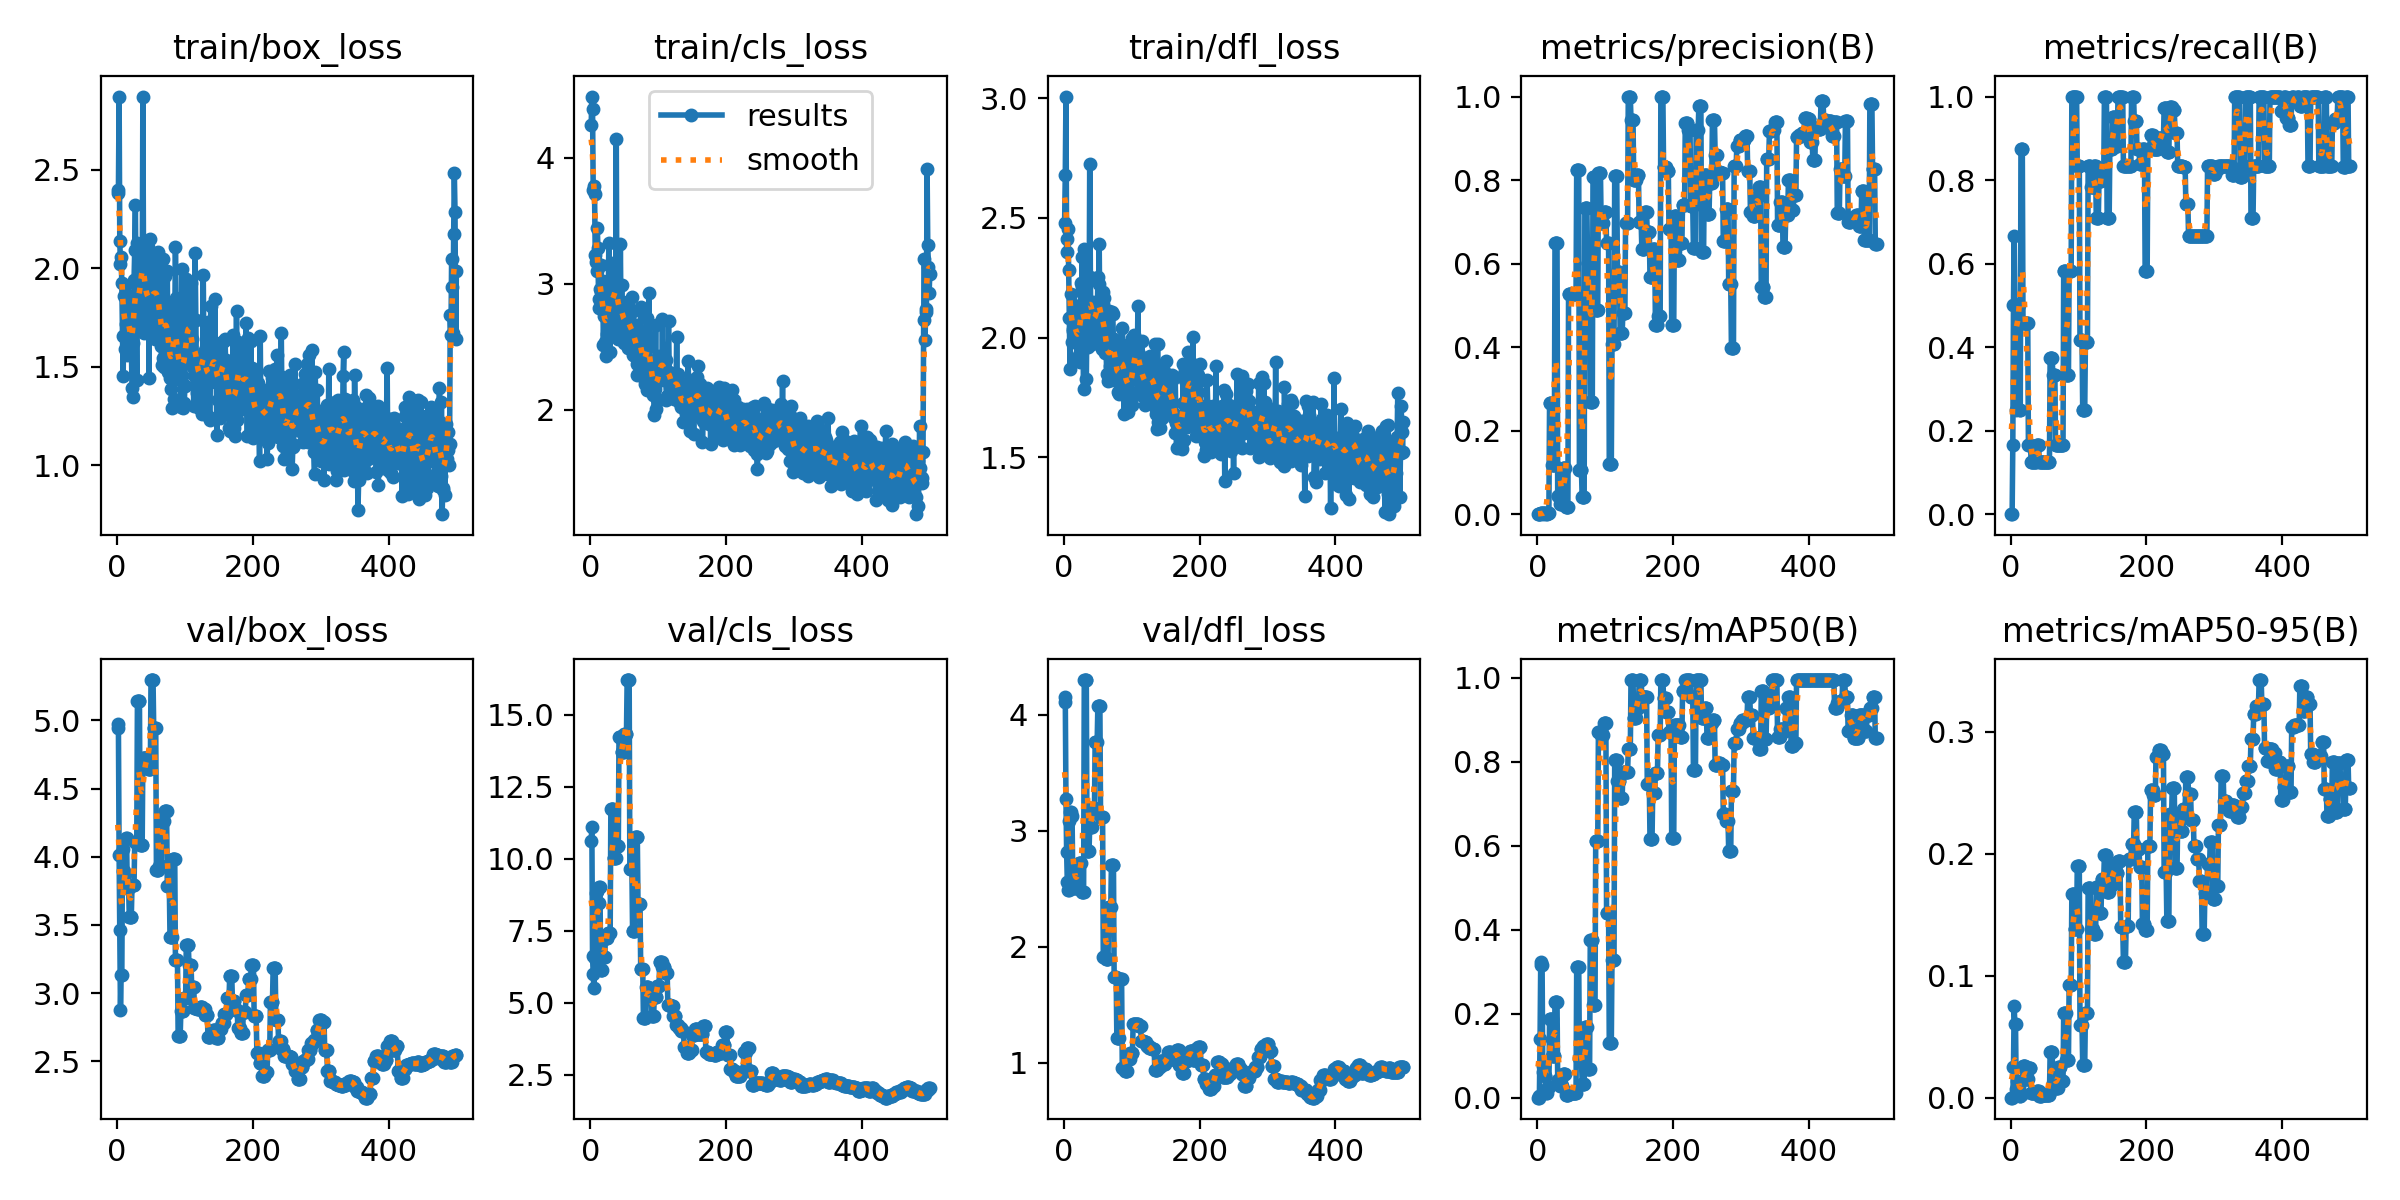

In [17]:
Image("/content/gdrive/MyDrive/hair_root/results/200_epochs-2/results.png")

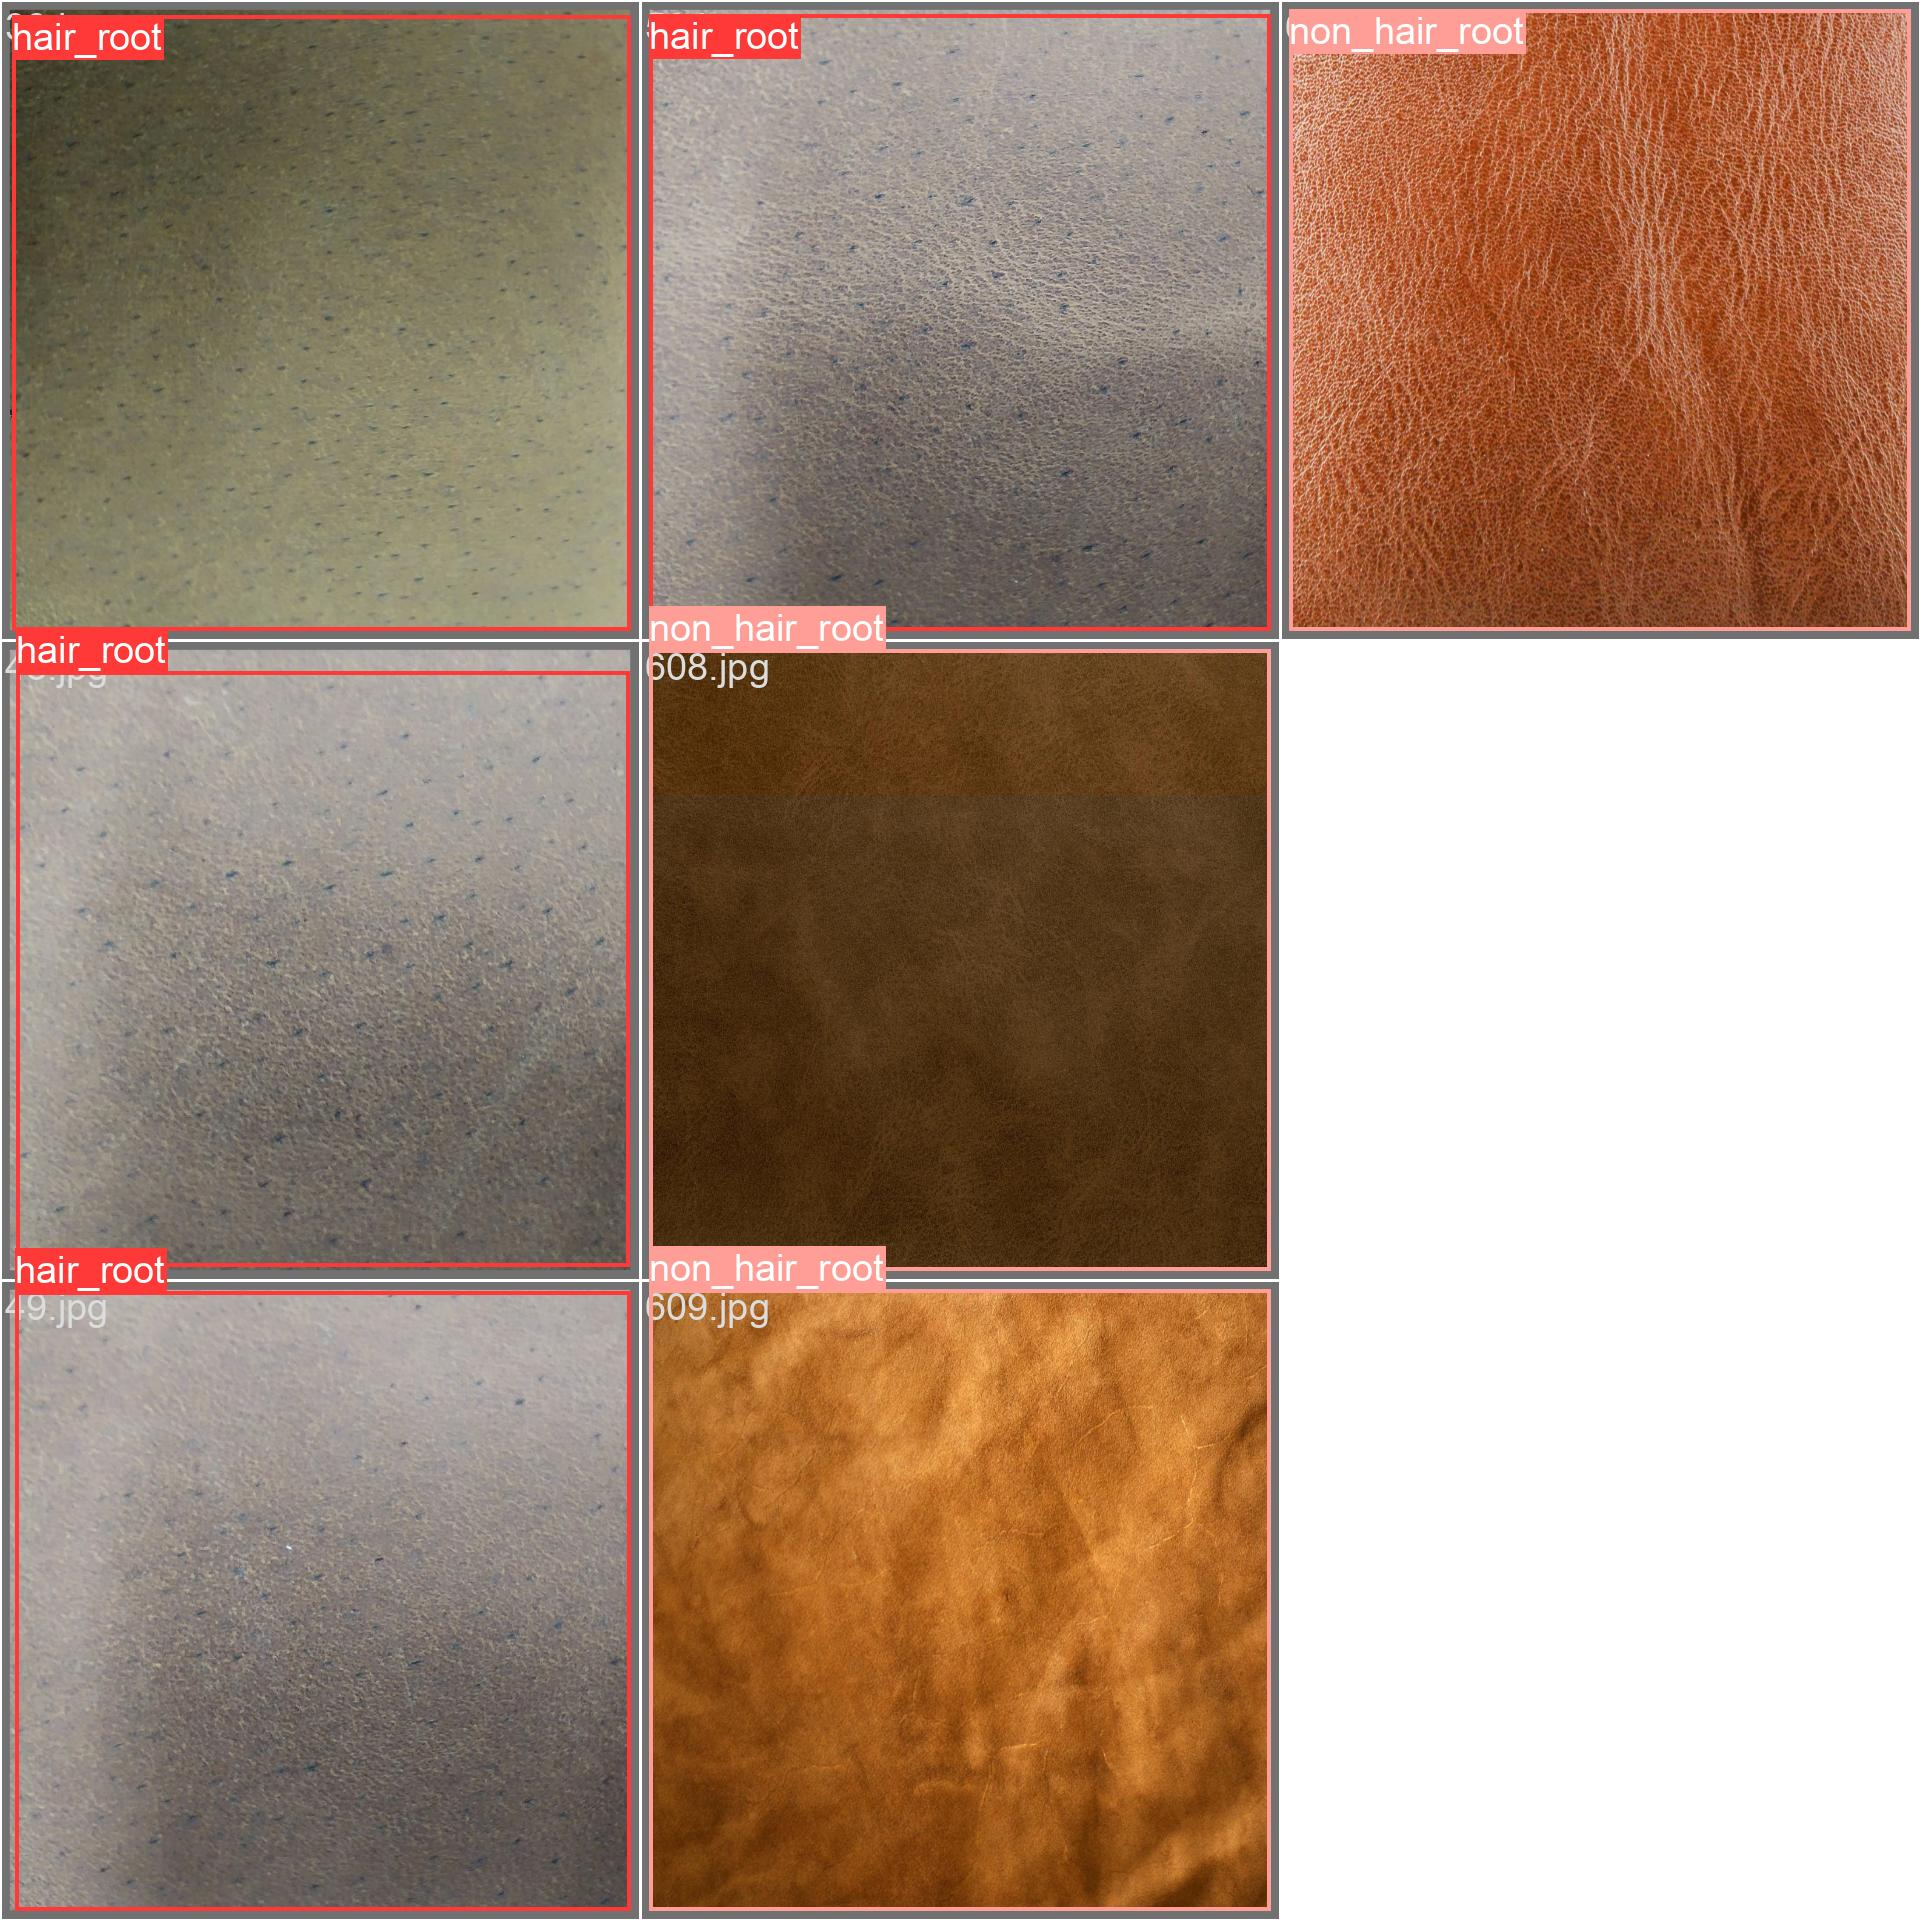

In [19]:
Image(filename='/content/gdrive/MyDrive/hair_root/results/200_epochs-2/val_batch0_labels.jpg', width=1024)

**Run inference**

Now that our model is trained, we can use it for inference.

In [20]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/gdrive/MyDrive/hair_root/results/200_epochs-2/weights

best.pt  last.pt


You can load the best model or the latest. I am picking the latest.

In [21]:
my_new_model = YOLO('/content/gdrive/MyDrive/hair_root/results/200_epochs-2/weights/best.pt')

Load an image and perform inference (segmentation).

In [44]:
new_image = '/content/gdrive/MyDrive/hair_root/test/18.jpg'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold



image 1/1 /content/gdrive/MyDrive/hair_root/test/18.jpg: 1024x800 2 hair_roots, 110.2ms
Speed: 10.3ms preprocess, 110.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 800)


The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results. Therefore, let us work with that one result.

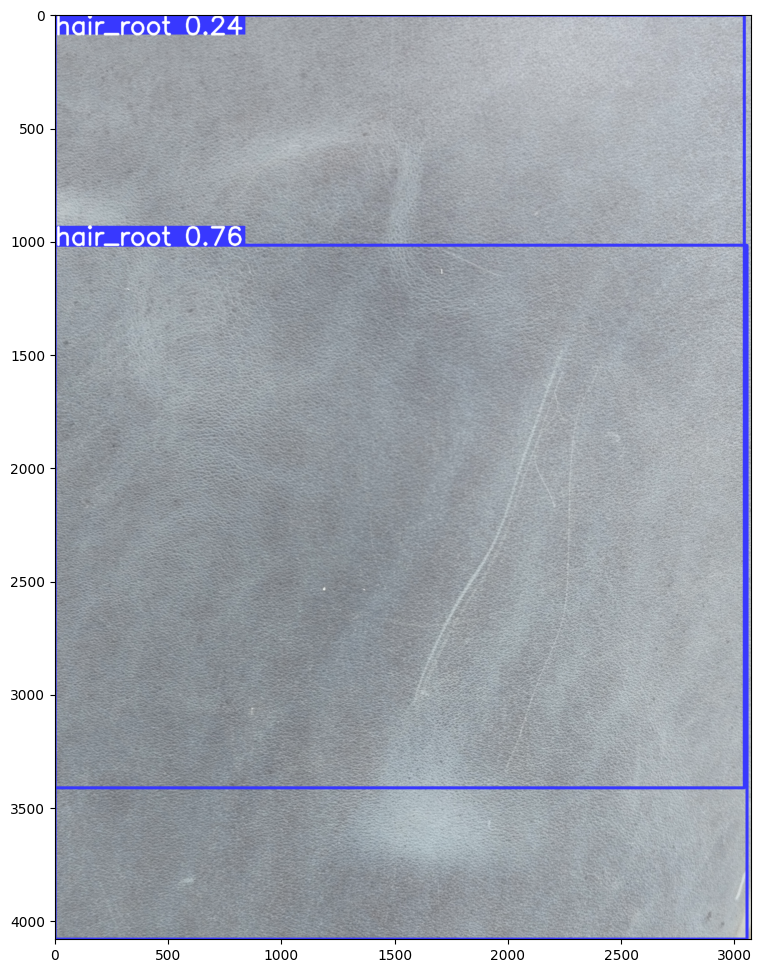

In [45]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array);

In [ ]:
new_results[0].plot()  # Plot the result, assuming it's a Matplotlib plot object
plt.figure(figsize=(12, 12))  # Create a new figure with specified size
plt.show()  # Display the plot

# If you want to save the plot as an array and then display it using plt.imshow()
# You may need to use plt.gcf() to get the current figure and then save it
# However, this approach depends on the type of plot and what exactly you want to achieve
# Here's how you might do it:

# Get the current figure
current_figure = plt.gcf()

# Convert the current figure to an array
new_result_array = current_figure.canvas.renderer.buffer_rgba()

# Display the array using plt.imshow()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)
plt.show()


AttributeError: 'FigureCanvasAgg' object has no attribute 'renderer'

In [ ]:

import imageio


import matplotlib.pyplot as plt
import numpy as np
import io

# Assuming new_results[0] is a numpy array or any other plot-able object
new_results = np.random.rand(100, 100)  # Example data, replace with your data

# Plot the result
plt.figure(figsize=(12, 12))
plt.imshow(new_results)
plt.axis('off')  # Turn off axis for cleaner display

# Capture the plot
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Read the buffer and display using plt.imshow()
image_data = imageio.imread(buffer)
plt.figure(figsize=(12, 12))
plt.imshow(image_data)
plt.axis('off')
plt.show()


<ipython-input-66-89a46ee40117>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_data = imageio.imread(buffer)


**Extracting bounding boxes and segmented masks from the result**

In [ ]:
new_result = new_results[0]

In [ ]:
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes', 'masks']
masks: ultralytics.engine.results.Masks object
names: {0: 'Alpha', 1: 'Cells', 2: 'Mito', 3: 'Vessels'}
orig_img: array([[[185, 185, 185],
        [194, 194, 194],
        [212, 212, 212],
        ...,
        [119, 119, 119],
        [127, 127, 127],
        [139, 139, 139]],

       [[192, 192, 192],
        [189, 189, 189],
        [200, 200, 200],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 98,  98,  98]],

       [[223, 223, 223],
        [199, 199, 199],
        [189, 189, 189],
        ...,
        [109, 109, 109],
        [117, 117, 117],
        [116, 116, 116]],

       ...,

       [[ 96,  96,  96],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [117, 117, 117],
        [107, 107, 107],
        [100, 100, 100]],

       [[ 88,  88,  88],
        [ 83,  83,  83],
        [108, 1

**Extracting bounding polygons** <p>
Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels)

In [ ]:
new_result.masks.xyn

[array([[     0.4825,       0.825],
        [    0.48125,     0.82625],
        [    0.47875,     0.82625],
        [     0.4775,      0.8275],
        [    0.47625,      0.8275],
        [    0.47375,        0.83],
        [     0.4725,        0.83],
        [    0.46875,     0.83375],
        [     0.4675,     0.83375],
        [    0.46625,       0.835],
        [      0.465,       0.835],
        [    0.46375,     0.83625],
        [     0.4625,     0.83625],
        [    0.45875,        0.84],
        [     0.4575,        0.84],
        [      0.455,      0.8425],
        [    0.45375,      0.8425],
        [    0.44625,        0.85],
        [    0.44625,      0.8525],
        [      0.445,     0.85375],
        [      0.445,        0.87],
        [    0.44625,     0.87125],
        [    0.44625,      0.8725],
        [     0.4475,     0.87375],
        [       0.45,     0.87375],
        [    0.45125,       0.875],
        [     0.4525,       0.875],
        [    0.45375,     0.

**Extracting segmented masks**

In [ ]:
extracted_masks = new_result.masks.data

In [ ]:
extracted_masks.shape

torch.Size([144, 800, 800])

Push the mask to cpu (from GPU) and convert to numpy array for easy plotting.

In [ ]:
masks_array = extracted_masks.cpu().numpy()

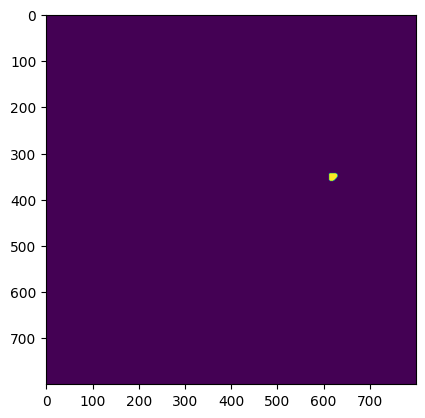

In [ ]:
plt.imshow(masks_array[9])

**Extracting labels for each class**

In [ ]:
class_names = new_result.names.values()
class_names

dict_values(['Alpha', 'Cells', 'Mito', 'Vessels'])

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

In [ ]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


Class Name: Alpha, Number of Masks: 34
Class Name: Cells, Number of Masks: 24
Class Name: Mito, Number of Masks: 1
Class Name: Vessels, Number of Masks: 85


**Extracting masks for a specific class**

In [ ]:
alpha_granule_masks = masks_by_class['Alpha']
cell_masks = masks_by_class['Cells']

In [ ]:
# Extract the original image
orig_img = new_result.orig_img

In [ ]:
orig_img.shape

(800, 800, 3)

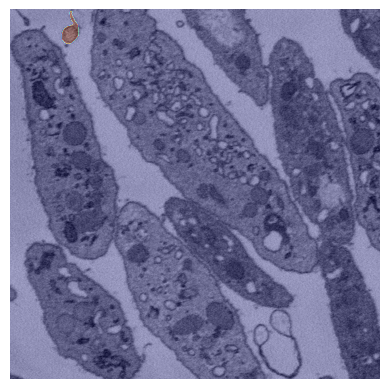

In [ ]:
# Display the original image
plt.imshow(orig_img, cmap='gray')

# Overlay the mask with some transparency
#plt.imshow(alpha_granule_masks[1], cmap='jet', alpha=0.3)
plt.imshow(cell_masks[4], cmap='jet', alpha=0.3)
plt.axis('off') # Turn off axis labels
plt.show()

**Calculating region properties for all objects and saving to a csv file.**

In [ ]:
import pandas as pd
from skimage.measure import regionprops

# Initialize a list to store the properties
props_list = []

# Iterate through all classes
for class_name, masks in masks_by_class.items():
    # Iterate through the masks for this class
    for mask in masks:
        # Convert the mask to an integer type if it's not already
        mask = mask.astype(int)

        # Apply regionprops to the mask
        props = regionprops(mask)

        # Extract the properties you want (e.g., area, perimeter) and add them to the list
        for prop in props:
            area = prop.area
            perimeter = prop.perimeter
            # Add other properties as needed

            # Append the properties and class name to the list
            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})

# Convert the list of dictionaries to a DataFrame
props_df = pd.DataFrame(props_list)

# Now props_df contains the properties and class names for all regions

# Save the DataFrame to a CSV file
props_df.to_csv('/content/drive/MyDrive/ColabNotebooks/data/3D-EM-Platelet/YOLOv8_object_properties.csv', index=False)

In [ ]:
props_df

,Class Name,Area,Perimeter
0,Alpha,2007,173.438600
1,Alpha,541,86.284271
2,Alpha,2604,195.681241
3,Alpha,1336,135.982756
4,Alpha,1039,119.840620
...,...,...,...
139,Vessels,228,59.556349
140,Vessels,145,44.142136
141,Vessels,161,47.798990
142,Vessels,85,31.899495


**Plotting results**

In [ ]:
import seaborn as sns


**Swarm plot**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


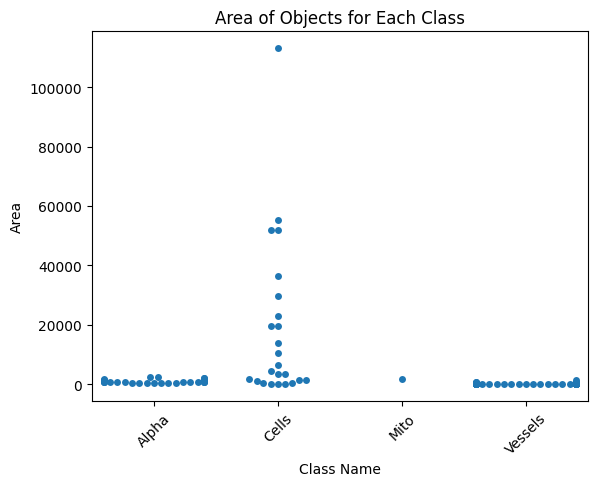

In [ ]:

# Create the swarm plot with Seaborn
sns.swarmplot(x='Class Name', y='Area', data=props_df)

# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Box Plot**

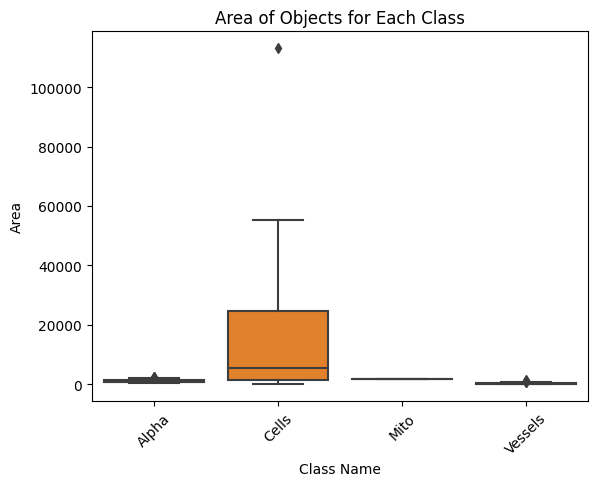

In [ ]:
sns.boxplot(x='Class Name', y='Area', data=props_df)
# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Export model to ONNX for deployment.**

In [ ]:
# Export the model
my_new_model.export(format='onnx', imgsz=[800,800])
